## Task 1

In [80]:
sleep8 = [5,7,5,3,5,3,3,9]
sleep4 = [8,1,4,6,6,4,1,2]

mean8 = sum(sleep8)/len(sleep8)
mean4 = sum(sleep4)/len(sleep4)
print(f"8hrs sleep sample mean: {mean8}")
print(f"8hrs sleep sample mean: {mean4}")

8hrs sleep sample mean: 5.0
8hrs sleep sample mean: 4.0


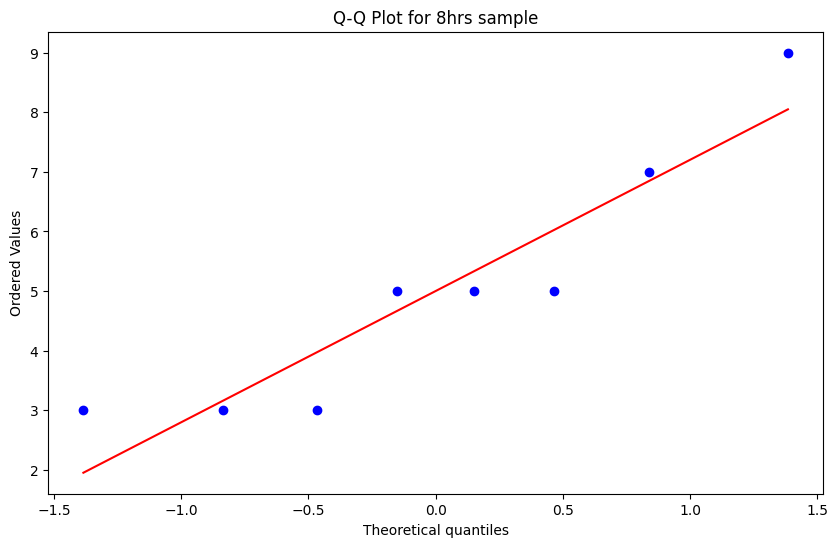

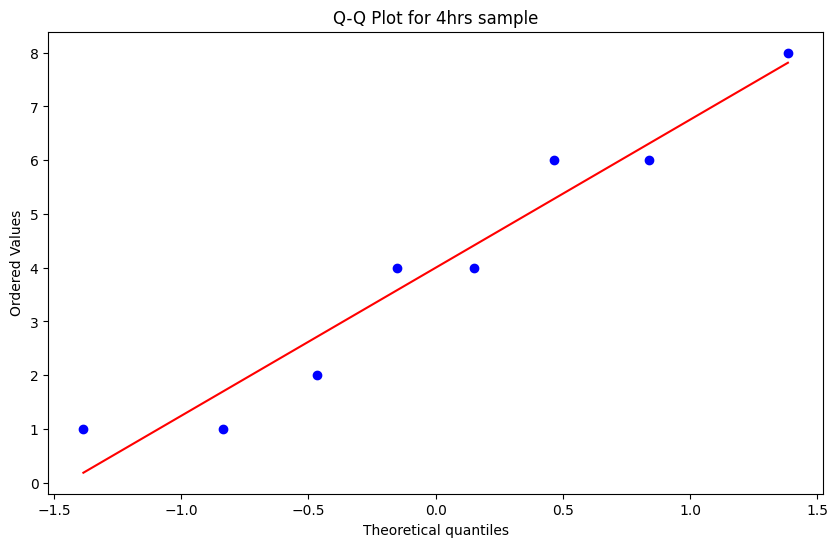

In [81]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
stats.probplot(sleep8, dist="norm", plot=plt)
plt.title("Q-Q Plot for 8hrs sample")
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(sleep4, dist="norm", plot=plt)
plt.title("Q-Q Plot for 4hrs sample")
plt.show()

In [82]:
shapiro8 = stats.shapiro(sleep8)
shapiro4 = stats.shapiro(sleep4)
print("Shapiro-Wilk test for 8hrs sleep sample:", shapiro8)
print("Shapiro-Wilk test for 4hrs sleep sample:", shapiro4)

# Interpretation of results
alpha = 0.05
if shapiro8.pvalue > alpha:
    print("For  8hrs sleep sample, we cannot reject the null hypothesis of normality.")
else:
    print("For  8hrs sleep sample, we reject the null hypothesis of normality.")

if shapiro4.pvalue > alpha:
    print("For  4hrs sleep sample, we cannot reject the null hypothesis of normality.")
else:
    print("For  4hrs sleep sample, we reject the null hypothesis of normality.")

Shapiro-Wilk test for 8hrs sleep sample: ShapiroResult(statistic=0.8599491351818725, pvalue=0.11993483660125931)
Shapiro-Wilk test for 4hrs sleep sample: ShapiroResult(statistic=0.9233961898940697, pvalue=0.4580222149575403)
For  8hrs sleep sample, we cannot reject the null hypothesis of normality.
For  4hrs sleep sample, we cannot reject the null hypothesis of normality.


In [83]:
levenge = stats.levene(sleep8, sleep4)
print(f"Levene p-value: {levenge.pvalue}")

if levenge.pvalue > alpha:
    print("Equal variances - we use pooled variance for students t test")
else:
    print("Non equal variances - we use unpooled variance for students t test")

Levene p-value: 0.49110337682754246
Equal variances - we use pooled variance for students t test


In [84]:
# h0: mean(sleep8) <= mean(sleep4)
# h1: mean(sleep8) > mean(sleep4)


t = stats.ttest_ind(sleep8, sleep4, equal_var=True, alternative='greater')

if t.pvalue < alpha:
    print(f"DECISION: Reject the null hypothesis (H0).\nStatistical Conclusion: The result is statistically significant.\nInterpretation: The Professor is CORRECT. The 8-hour sleep group scored significantly higher.")
else:
    print(f"DECISION: Fail to reject the null hypothesis (H0).\nStatistical Conclusion: The result is NOT statistically significant.\nInterpretation: The Professor is INCORRECT (based on this sample). The difference between groups is too small to be considered certain.")

DECISION: Fail to reject the null hypothesis (H0).
Statistical Conclusion: The result is NOT statistically significant.
Interpretation: The Professor is INCORRECT (based on this sample). The difference between groups is too small to be considered certain.


In [85]:
# effect size calculations
import pingouin as pg
cohens_d = pg.compute_effsize(sleep8, sleep4, eftype='cohen')

print(f"Cohen's d: {cohens_d:.3f}")

if abs(cohens_d) < 0.2:
    effect_size = "small"
elif abs(cohens_d) < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"The effect size (Cohen's d) is {cohens_d:.2f}, which is considered a {effect_size} effect.")

Cohen's d: 0.424
The effect size (Cohen's d) is 0.42, which is considered a medium effect.


In [86]:
# power analysis
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
power = analysis.solve_power(effect_size=cohens_d, nobs1=len(sleep8), alpha=alpha, ratio=len(sleep8)/len(sleep4), alternative='larger')
print(f"Power of the test: {power:.2f}")

required_n = analysis.solve_power(effect_size=cohens_d, power=0.8, alpha=alpha, ratio=len(sleep8)/len(sleep4), alternative='larger')

print(f"Required sample size for 80% power: {required_n:.2f} per group")

Power of the test: 0.20
Required sample size for 80% power: 69.58 per group


An independent samples t-test was performed to evaluate the hypothesis that individuals sleeping only four hours would score significantly lower on a cognitive skills test compared to those sleeping eight hours. The analysis yielded a t-statistic of **0.85** and a p-value of **0.206**. Since the p-value exceeds the standard alpha level of **0.05**, the null hypothesis cannot be rejected, meaning the observed difference is not statistically significant. However, the effect size calculation resulted in a Cohen's d of **0.42**, indicating a medium practical difference where the 8-hour group performed better by nearly half a standard deviation. A  power analysis revealed that the study was severely underpowered due to the small sample size of 16 participants, offering only a roughly **20%** chance of detecting an effect of this magnitude. Consequently, while the current data fails to statistically confirm the professor's hypothesis, the results suggest a potential trend that might be confirmed with a larger sample size.

## Task 2

In [87]:
import numpy as np
before = np.array([7, 20, 18, 9, 8, 11, 13, 15])
after  = np.array([18, 25, 22, 15, 14, 15, 19, 29])
diff = after - before

mean_diff = sum(diff)/len(diff)
print(f"drivers beer consumption difference mean: {mean_diff}")

drivers beer consumption difference mean: 7.0


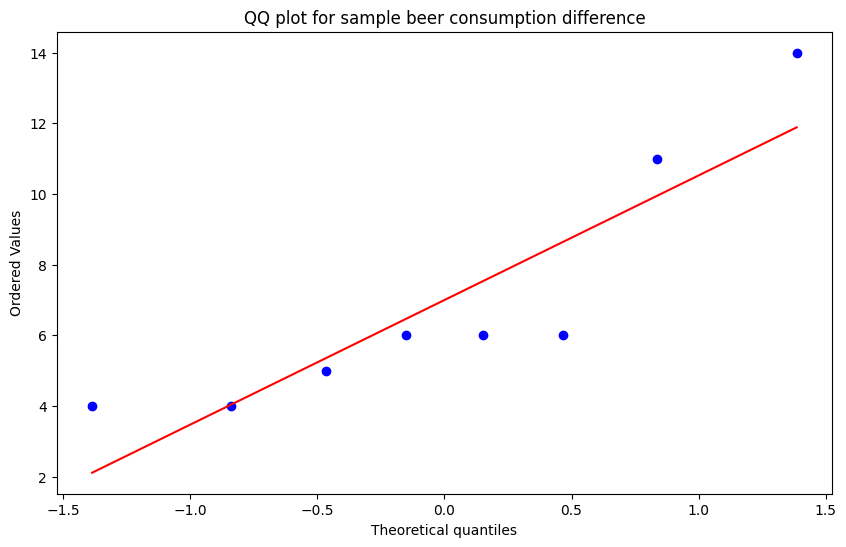

In [88]:
plt.figure(figsize=(10,6))
stats.probplot(diff, dist="norm", plot=plt)
plt.title("QQ plot for sample beer consumption difference")
plt.show()

In [89]:


shapiro_test = stats.shapiro(diff)
print(f"Shapiro p-value for differences: {shapiro_test.pvalue}")
lpha = 0.05
if shapiro_test.pvalue > alpha:
    print("For sample differences, we cannot reject the null hypothesis of normality.")
else:
    print("For sample differences, we reject the null hypothesis of normality.")

Shapiro p-value for differences: 0.0231722998558535
For sample differences, we reject the null hypothesis of normality.


In [90]:
# h0: median(after) <= median(before)
# h1 median(after) > median(before)

test = stats.wilcoxon(after, before, alternative="greater")

if test.pvalue < alpha:
    print("Conclusion: REJECT H0. Alcohol significantly impairs reaction time (reaction times are higher).")
else:
    print("Conclusion: FAIL TO REJECT H0. There is insufficient evidence to conclude that alcohol impairs reaction time.")




Conclusion: REJECT H0. Alcohol significantly impairs reaction time (reaction times are higher).


In [91]:
d = pg.compute_effsize(x=after, y=before, paired=True, eftype='cohen')
print(f"Cohen's d: {d:.3f}")

if abs(d) < 0.2:
    effect_size = "small"
elif abs(d) < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"The effect size (Cohen's d) is {d:.2f}, which is considered a {effect_size} effect.")

Cohen's d: 1.385
The effect size (Cohen's d) is 1.38, which is considered a large effect.


In [92]:
print(f"Median Before: {np.median(before)}")
print(f"Median After:  {np.median(after)}")

Median Before: 12.0
Median After:  18.5


A Wilcoxon test showed a statistically significant increase in reaction times after consuming two beers. Therefore, the null hypothesis is rejected. The effect size was very large (Cohen's d=1.54), indicating a substantial practical deterioration in performance. The data strongly confirms that alcohol significantly impairs driving capabilities.

## Task 3

In [93]:
import pandas as pd
# Day
day_total = 58593
day_survived = 11604
day_died = day_total - day_survived

# Night
night_total = 28593
night_survived = 4139
night_died = night_total - night_survived

contingency_table = pd.DataFrame(
    {
        'Survived': [day_survived, night_survived],
        'Died': [day_died, night_died]
    },
    index=['Day', 'Night']
)
print(contingency_table)

       Survived   Died
Day       11604  46989
Night      4139  24454


In [94]:
# h0: day_survived/day_total = night_survived/night_total
# h1: day_survived/day_total != night_survived/night_total
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared test statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared test statistic: 368.4228718964283
p-value: 4.1265369120829217e-82
Degrees of freedom: 1
Expected frequencies:
 [[10580.01971647 48012.98028353]
 [ 5162.98028353 23430.01971647]]


In [95]:
alpha = 0.01 

if p < alpha:
    print("Decision: Reject H0.")
    print("Conclusion: There is a SIGNIFICANT difference in survival rates between day and night.")
else:
    print("Decision: Fail to reject H0.")
    print("Conclusion: There is NO significant difference in survival rates between day and night.")

Decision: Reject H0.
Conclusion: There is a SIGNIFICANT difference in survival rates between day and night.


In [96]:

rate_day = day_survived / (day_survived + day_died)
rate_night = night_survived / (night_survived + night_died)

print(f"Survival Rate Day:   {rate_day*100:.1f}%")
print(f"Survival Rate Night: {rate_night*100:.1f}%")

Survival Rate Day:   19.8%
Survival Rate Night: 14.5%


A Chi-square test was conducted to analyze survival rates for cardiac arrest patients based on the time of the event (Day vs. Night). The results indicate a statistically significant association between time of day and survival ($\chi^2 = 362.6, p < 0.001$). Specifically, the survival rate during the day was 19.8%, compared to 14.5% at night.

# Homework

In [97]:
brandA = [19,25,33,40,50,29]
brandB = [10,15,40,50,30,15,20]

meanA = sum(brandA)/len(brandA)
meanB = sum(brandB)/len(brandB)
print(f"brand A relief sample mean: {meanA}")
print(f"brand B relief sample mean: {meanB}")

brand A relief sample mean: 32.666666666666664
brand B relief sample mean: 25.714285714285715


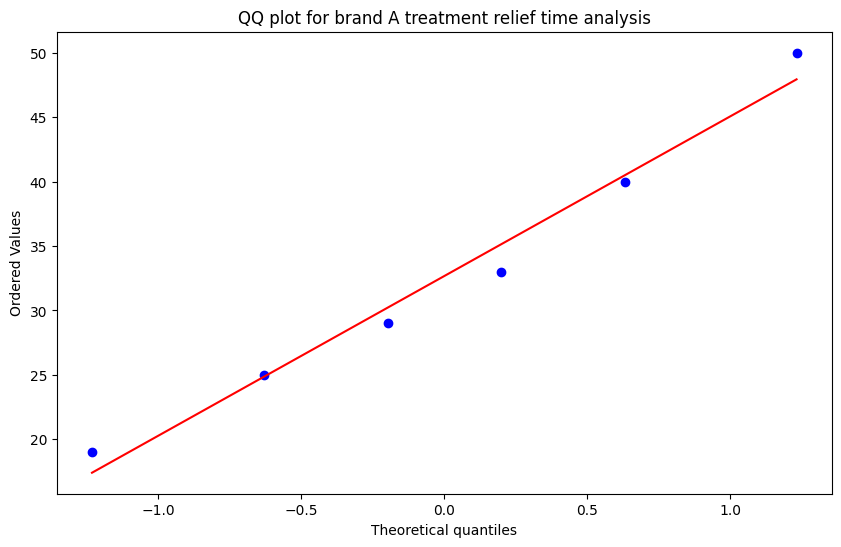

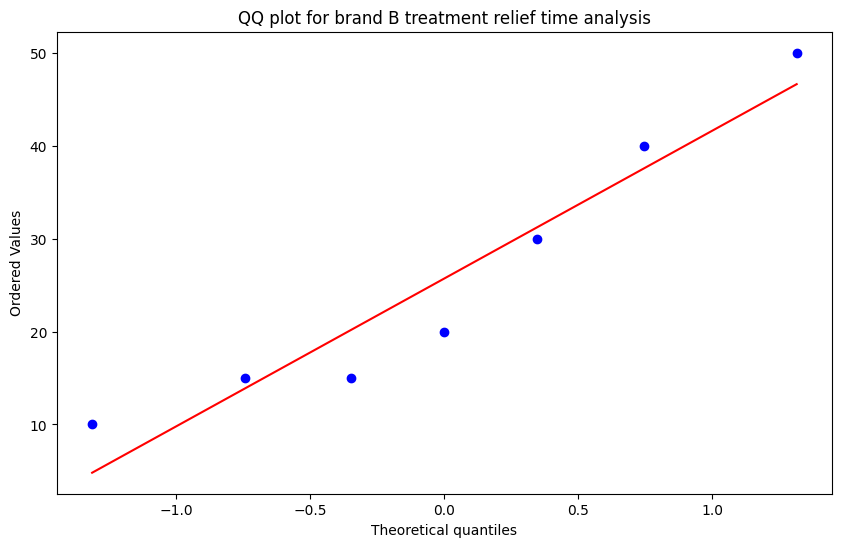

In [98]:
plt.figure(figsize=(10,6))
stats.probplot(brandA, dist="norm", plot=plt)
plt.title("QQ plot for brand A treatment relief time analysis")
plt.show()
plt.figure(figsize=(10,6))
stats.probplot(brandB, dist="norm", plot=plt)
plt.title("QQ plot for brand B treatment relief time analysis")
plt.show()


In [99]:
shapiro_A = stats.shapiro(brandA)
shapiro_B = stats.shapiro(brandB)
print("Shapiro-Wilk test for brand A sample:", shapiro8)
print("Shapiro-Wilk test for brand B sample:", shapiro4)

alpha = 0.05
if shapiro_A.pvalue > alpha:
    print("For brand A sample, we cannot reject the null hypothesis of normality.")
else:
    print("For brand A sample, we reject the null hypothesis of normality.")

if shapiro_B.pvalue > alpha:
    print("For brand B sample, we cannot reject the null hypothesis of normality.")
else:
    print("For brand B sample, we reject the null hypothesis of normality.")

Shapiro-Wilk test for brand A sample: ShapiroResult(statistic=0.8599491351818725, pvalue=0.11993483660125931)
Shapiro-Wilk test for brand B sample: ShapiroResult(statistic=0.9233961898940697, pvalue=0.4580222149575403)
For brand A sample, we cannot reject the null hypothesis of normality.
For brand B sample, we cannot reject the null hypothesis of normality.


In [100]:
levenge = stats.levene(brandA, brandB)
print(f"Levene p-value: {levenge.pvalue}")

if levenge.pvalue > alpha:
    print("Equal variances - we use pooled variance for students t test")
else:
    print("Non equal variances - we use unpooled variance for students t test")

Levene p-value: 0.5395109033453769
Equal variances - we use pooled variance for students t test


In [101]:
# h0: mean(brandA) <= mean(brandB)
# h1: mean(brandA) > mean(brandB)

test = stats.ttest_ind(brandA,brandB, alternative="greater", equal_var=True)
alpha = 0.05
if test.pvalue < alpha:
    print(f"DECISION: REJECT H0 (Significant).\nInterpretation: The company is CORRECT. The brand A medicine provides faster relief based on sampled groups.")
else:
    print(f"DECISION: FAIL TO REJECT H0 (Not Significant).\nInterpretation: The company is NOT supported by the data. There is no significant difference in relief time between sampled groups.")

DECISION: FAIL TO REJECT H0 (Not Significant).
Interpretation: The company is NOT supported by the data. There is no significant difference in relief time between sampled groups.


In [102]:
cohens_d = pg.compute_effsize(brandA, brandB, eftype='cohen')

print(f"Cohen's d: {cohens_d:.3f}")

if abs(cohens_d) < 0.2:
    effect_size = "small"
elif abs(cohens_d) < 0.5:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"The effect size (Cohen's d) is {cohens_d:.2f}, which is considered a {effect_size} effect.")

Cohen's d: 0.524
The effect size (Cohen's d) is 0.52, which is considered a large effect.


In [103]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
ratio = len(brandB)/len(brandA)
power = analysis.solve_power(effect_size=cohens_d, nobs1=len(brandA), alpha=alpha, ratio=ratio, alternative='larger')
print(f"Power of the test: {power:.2f}")

required_n1 = analysis.solve_power(effect_size=cohens_d, power=0.8, alpha=alpha, ratio=ratio, alternative='larger')
required_n2 = required_n1 / ratio
required_n2 = required_n1 * ratio

print(f"Required sample size for 80% power (summing up to {np.ceil(required_n1)+np.ceil(required_n2):.0f}):")
print(f"Brand A: {np.ceil(required_n1):.0f}")
print(f"Brand B: {np.ceil(required_n2):.0f}")

Power of the test: 0.22
Required sample size for 80% power (summing up to 93):
Brand A: 43
Brand B: 50


A sample t-test was performed to evaluate the claim that Brand A provides faster pain relief than Brand B. The analysis showed that Brand A had a slower mean relief time of 32.7 minutes compared to 25.7 minutes for Brand B. The difference was not statistically significant, so the null hypothesis was not rejected. The effect size was 0.52, indicating a high difference between the groups. A  power analysis revealed the study had only 22% power due to the small sample size of 13 participants. To achieve 80% statistical power, the study would need to be replicated with approximately 93 participants.